# Projeto EletroMag - Medidor de Tensão Wireless
### Camila Junqueira, João Vitor Oliveira, Lucca Nasser, Stephani Ferreira

Imports

In [131]:
from cmath import *
from math import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

## Esquema das Bobinas
### Diagrama do Modelo Eletrodinâmico do Circuito WPT em abordagem Fasorial

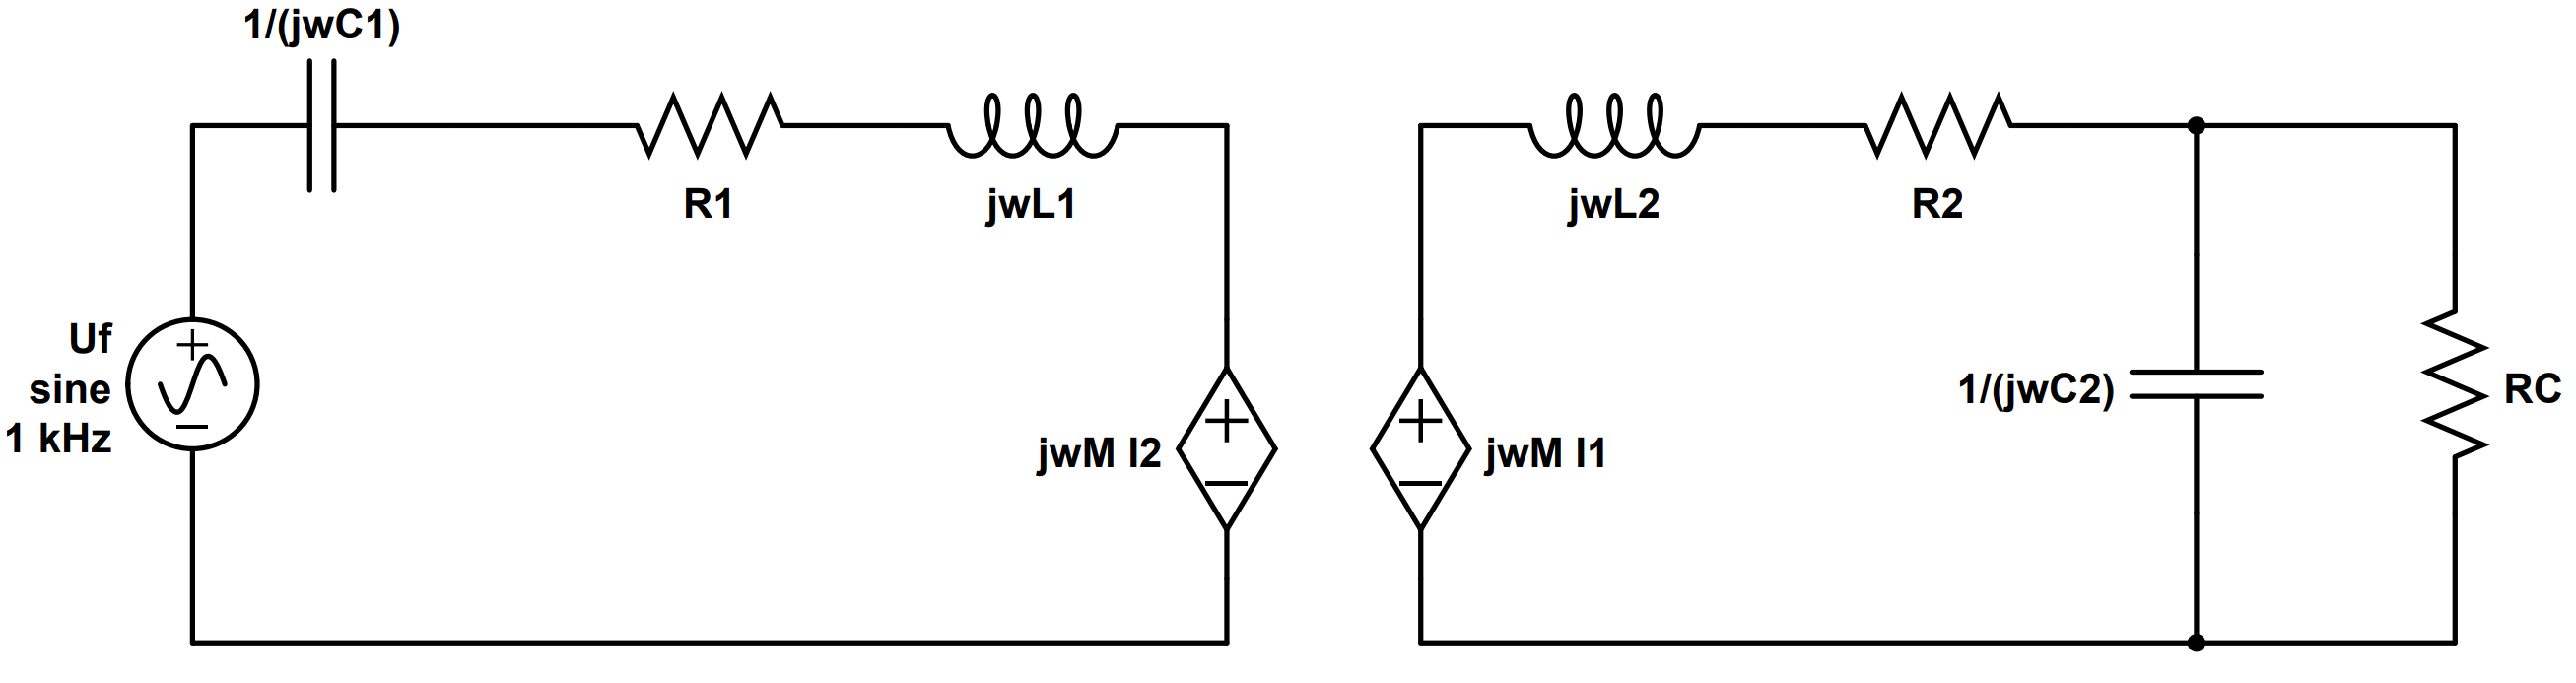

### Definindo os Parâmetros

In [132]:
# Resistências
R1 = 10
R2 = 10

# Indutâncias
L1 = 1*10**-3
L2 = 1*10**-3

# Capacitâncias
C1 = 1*10**-6
C2 = 1*10**-6

# Frequência
freq = 1/(sqrt(L1*C1))

# Frequência Angular
w = 2 * pi * freq

# Tensão de Pico
t_pico = 1 / w

# Indutância Mútua
k = 0.1
M = k * sqrt(L1 * L2)

# Impedâncias
XL1 = 1j * w * L1
XL2 = 1j * w * L2

XC1 = 1/(1j * w * C1)
XC2 = 1/(1j * w * C2)

XM = 1j * w * M

### Função de Cálculo das correntes $Î_1$ e $Î_2$

In [133]:
def CalculaLeonardo(Uf, Rc):
    Z=np.array([
        [R1+XL1+XC1             ,    -XM],
        [-XM, R2+XL2+(Rc/(Rc*1j*w*C2+1))]
                ])
    V=np.array([Uf,
                0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

## Simulação
- Escolha dos valores de Frequência de Operação, Capacitores e Indutâncias

### Gráfico $V_2$ x $f$

In [1]:
Uf = 10
Rc = 400
k = 0.1

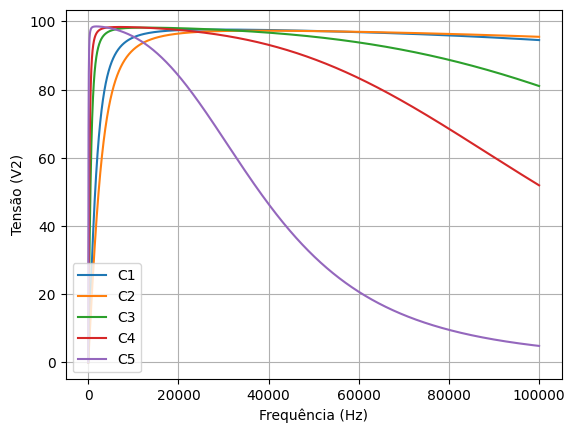

In [139]:
capacitores = [150*10**-9, 0.1*10**-6, 0.47*10**-6, 1*10**-6, 4.7*10**-6]
frequencias = np.arange(0.1,100*10**3,10)
V2_list = []

Rdc = 0.05

n = 0
for C in capacitores:
    V2_list = []
    n = n + 1
    for f in frequencias:

        C1 = C2 = C

        R = R1 = R2 = Rdc + (2*Rdc/(100*10**3)) * f
        w = 2 * pi * f
        L = L1 = L2 = 1/((f**2)*4*(pi**2)*C)

        XC = XC1 = XC2 = 1/(1j * w * C)
        XL = XL1 = XL2 = 1j * w * L
        
        M = k * sqrt(L**2)
        XM = 1j * w * M

        i1, i2 = CalculaLeonardo(Uf, Rc)

        V2 = ((Rc*XC)/(Rc+XC))*i2
        V2_list.append(abs(V2))
    plt.plot(frequencias, V2_list, label = "C" + str(n))
plt.xlabel("Frequência (Hz)")
plt.ylabel("Tensão (V2)")
plt.legend()
plt.grid()
plt.show()

## Construção das Bobinas

Tensão Máxima: 5V (entrada analógica do Arduino)